## Student Performance Indicator

### ---------- Steps------------
#### 1. EDA Data Analysis
#### 2. Data Pre-Processing
#### 3. Model Training
#### 4. Chose Best Model

### 1. Problem Statement
This Project understands how the students performance (test score) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test Preparation Course.

### 2. Importing Data and Required Packages

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading the Dataset

In [2]:
df = pd.read_csv('data/stud.csv')

#### Showing top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.1 Dataset Information
Gender : sex of students -> (Male/Female)

race/ethnicity : ethnicity of student -> (Group A, B, C, D, E)

parent level of education : parent's final education -> (bachelor's degree, some college, master's   degree, associate's degree, high school)

lunch : having lunch before test -> (standard or free/reduced)

test preparation course : completed or not completed before test

match score

reading score

writing score

### 3. Data Checks to Perform
Check Missing Values

Check Duplicates

Check Data Types

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### 3.3 Check Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values in each columns

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check Statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3.6 Exploring Data

In [10]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [11]:
print('Categories in "gender" variable: ', end = " ")
print(df['gender'].unique())

print('Categories in "race_ethnicity" variable:  ', end = "")
print(df['race_ethnicity'].unique())

print('Categories in "parental_level_of_education" variable:  ', end = "")
print(df['parental_level_of_education'].unique())

print('Categories in "test_preparation_course" variable:  ', end = " ")
print(df['test_preparation_course'].unique())

Categories in "gender" variable:  ['female' 'male']
Categories in "race_ethnicity" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental_level_of_education" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "test_preparation_course" variable:   ['none' 'completed']


#### Find Numerical & Categorical Columns

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature Engineering

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.7 Adding columns for "Total Score" and "Average" 

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [15]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of students with full marks in reading : {reading_full}")
print(f"Number of students with full marks in writing : {writing_full}")
print(f"Number of students with full marks in math : {math_full}")

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [16]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f"Number of students less than 20 marks in reading : {reading_less_20}")
print(f"Number of students less than 20 marks in writing : {writing_less_20}")
print(f"NUmber of students less than 20 marks in math : {math_less_20}")

Number of students less than 20 marks in reading : 1
Number of students less than 20 marks in writing : 3
NUmber of students less than 20 marks in math : 4


## 4. Exploring Data (Visualization)
#### 4.1 Visualize average score distribution to make some conclusion
 - Histogram
 - Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

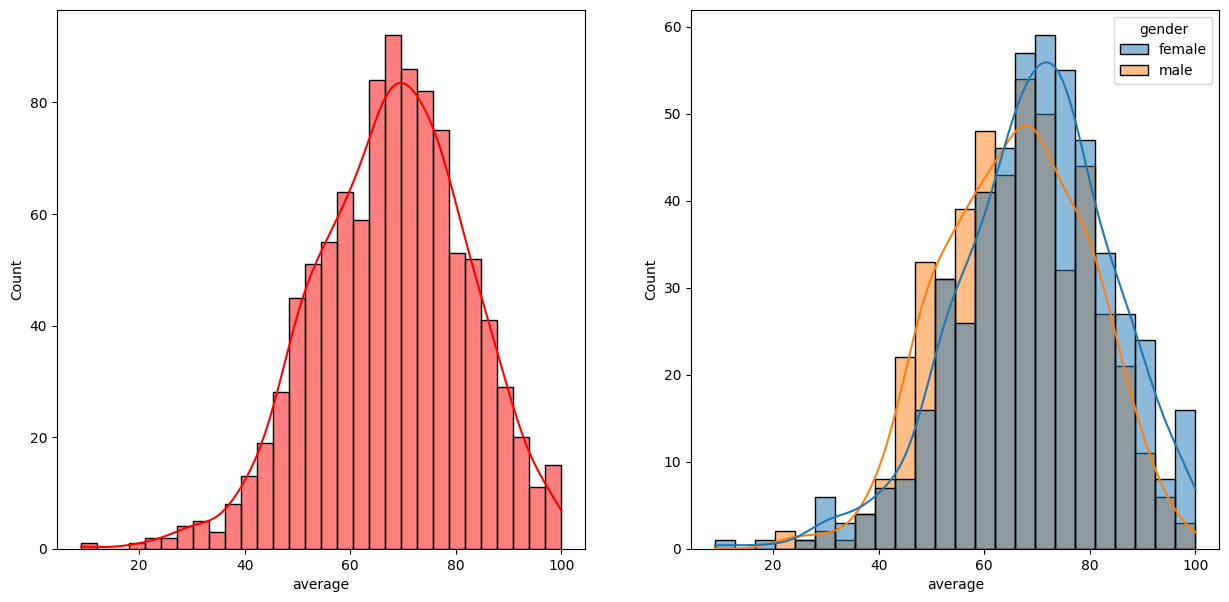

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'r')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

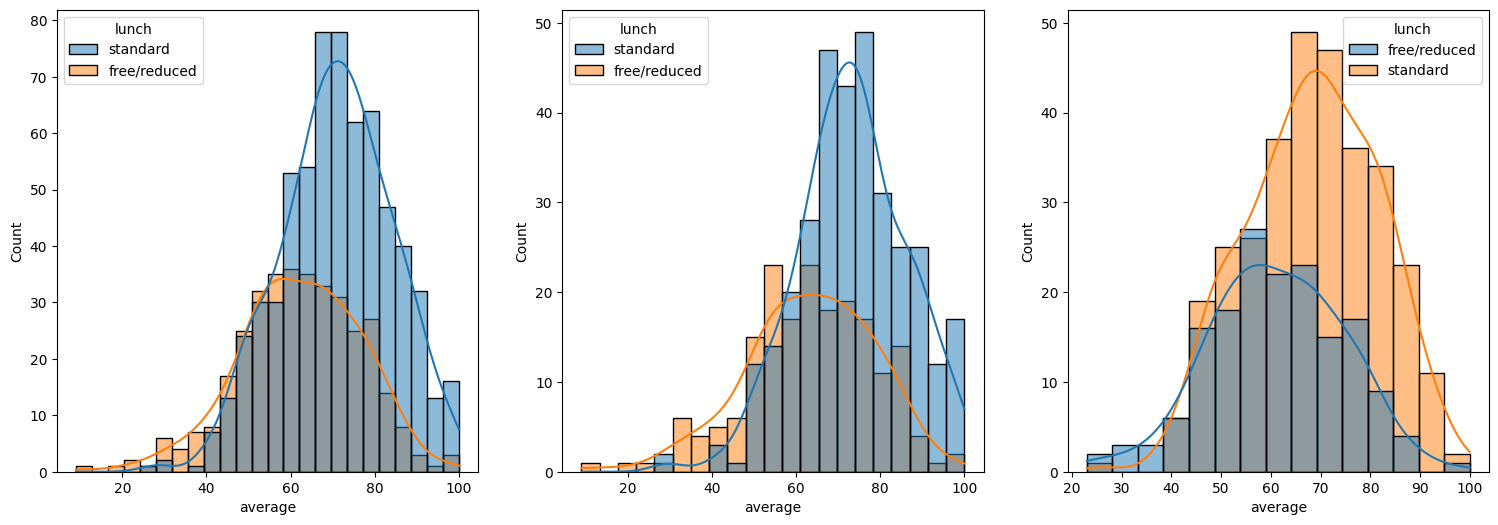

In [18]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

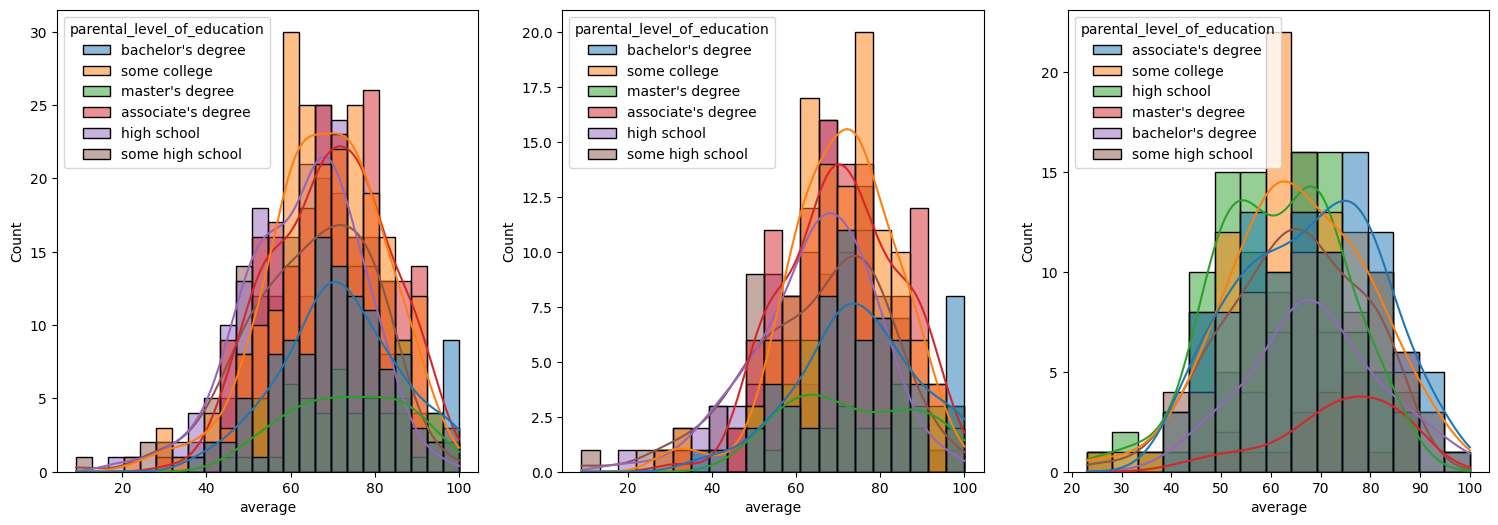

In [19]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, 
             hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')
plt.show()

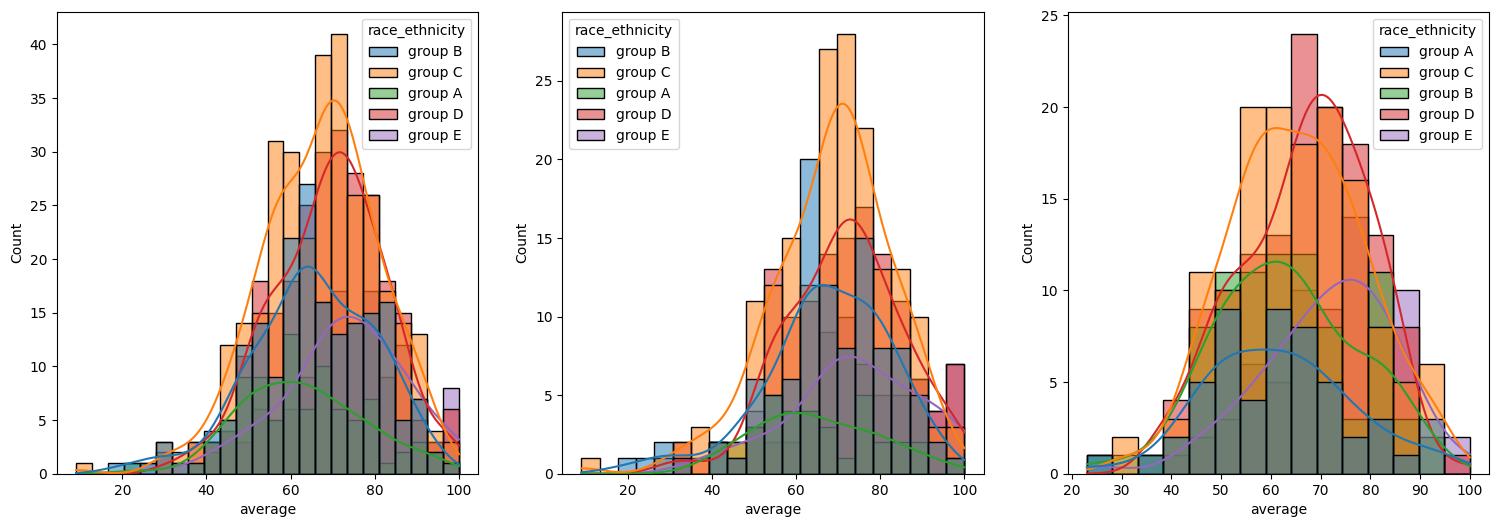

In [20]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race_ethnicity')
plt.show()

#### 4.2 Maximum score of students in all three subjects 

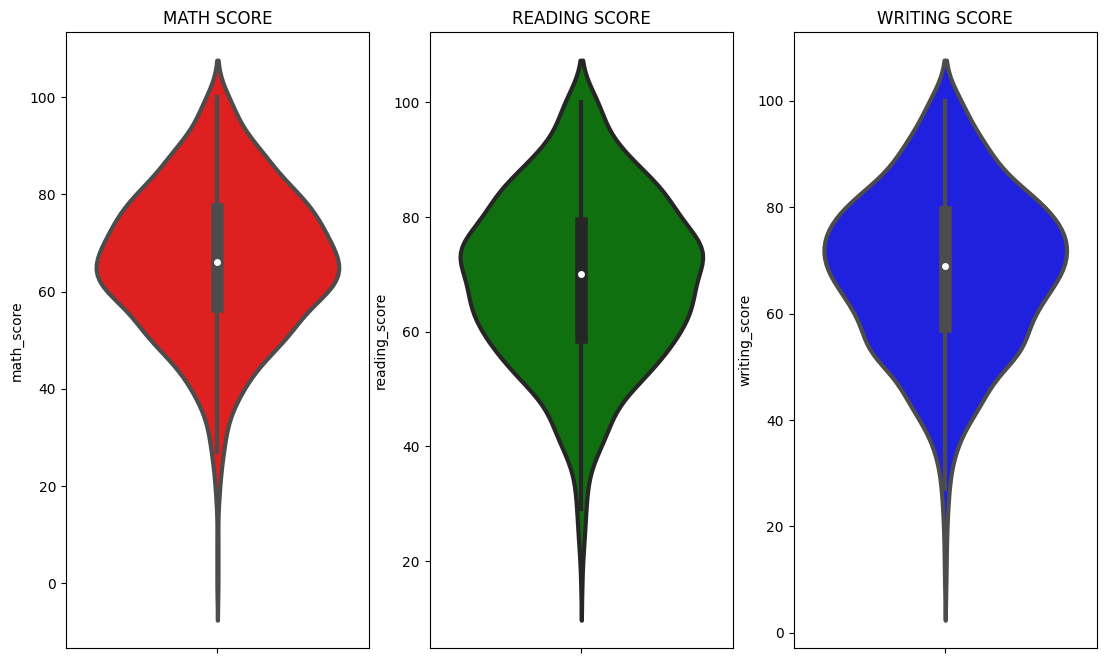

In [21]:
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORE")
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)
plt.subplot(1,4,2)
plt.title("READING SCORE")
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,4,3)
plt.title("WRITING SCORE")
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth = 3)
plt.show()

#### 4.3 Multivariate analysis using pieplot

In [22]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

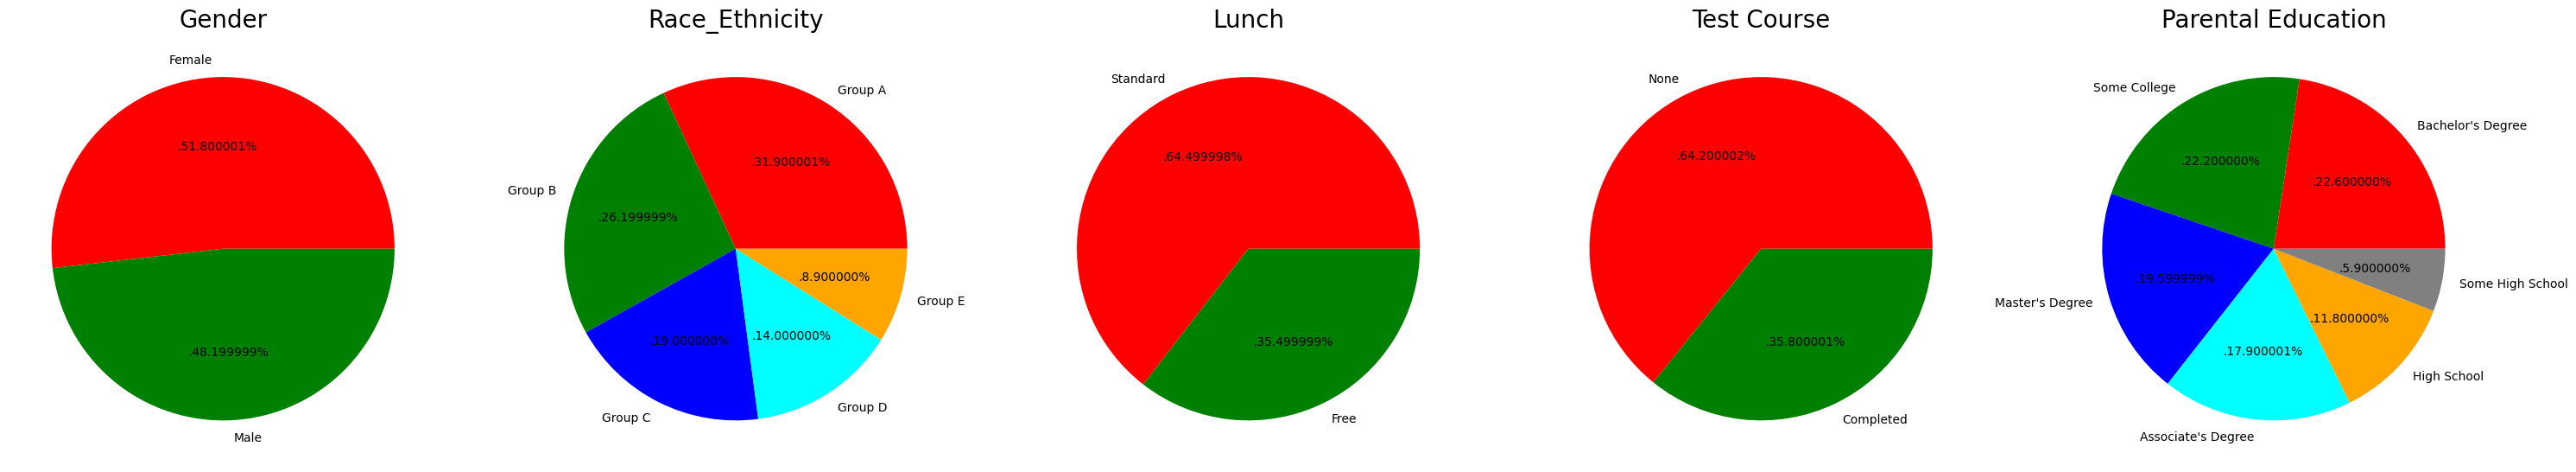

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title("Gender", fontsize = 20)
plt.axis('off')


plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A','Group B','Group C','Group D','Group E'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title("Race_Ethnicity", fontsize = 20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title("Lunch", fontsize = 20)
plt.axis('off')


plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title("Test Course", fontsize = 20)
plt.axis('off')


plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "Bachelor's Degree", 'Some College', "Master's Degree","Associate's Degree", 'High School', 'Some High School'
colors = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = colors, labels = labels, autopct = '.%2f%%')
plt.title("Parental Education", fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### 4.4 Feature Wise Visualization
#### 4.4.1 Gender Column
- How is distribution of gender?
- Is gender has any imapct of student's performance?

#### Univariate Analysis (How is distribution of gender?)

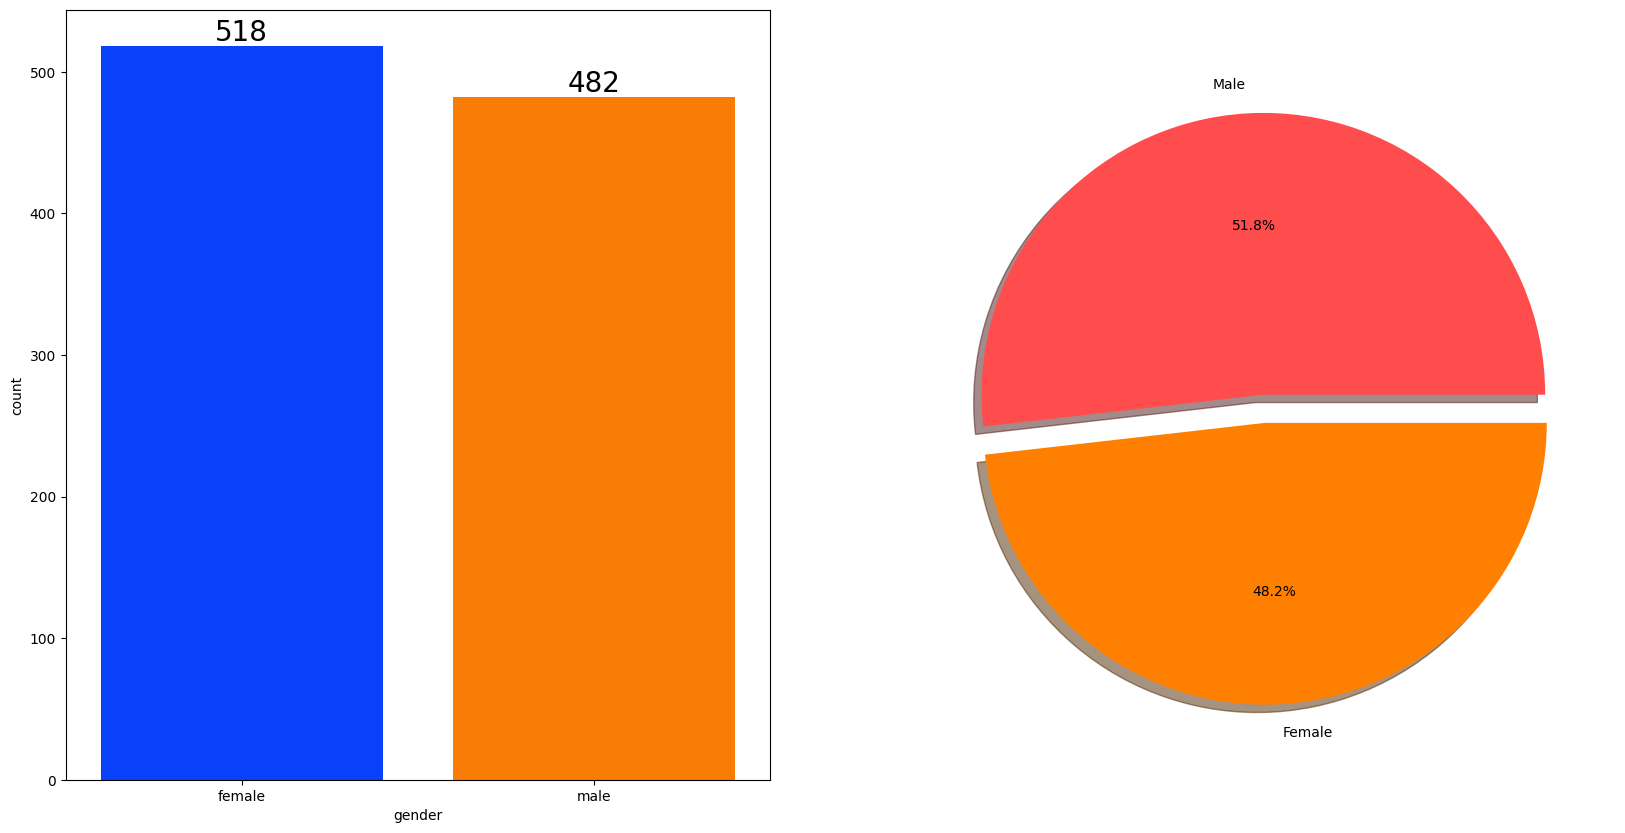

In [24]:
f, ax = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x = df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x = df['gender'].value_counts(), labels = ["Male","Female"], explode = [0,0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)

In [25]:
gender_group = df.groupby('gender')['average'].mean()
gender_group

gender
female    69.569498
male      65.837483
Name: average, dtype: float64

In [26]:
# plt.figure(figsize = (10,8))

# X = ['Total Avrage','Math Average']

# female_score = [gender_group['average'][0], gender_group['math_score'][0]]
# male_score = [gender_group['average'][1], gender_group['math_score'][1]]

# X_axis = np.arange(len(X))

# plt.bar(X_axis - 0.2, male_score, 0.4, label = "Male")
# plt.bar(X_axis + 0.2, female_score, 0.4, label = "Female")

# plt.xticks(X_axis, X)
# plt.ylabel("Marks")
# plt.title("Total average")
# plt.legend()
# plt.show()

#### 4.4.2 Race_Ethnicity Column
- How is group wise distribution?
- Is Race_Ethnicity has any impact on student's performance?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

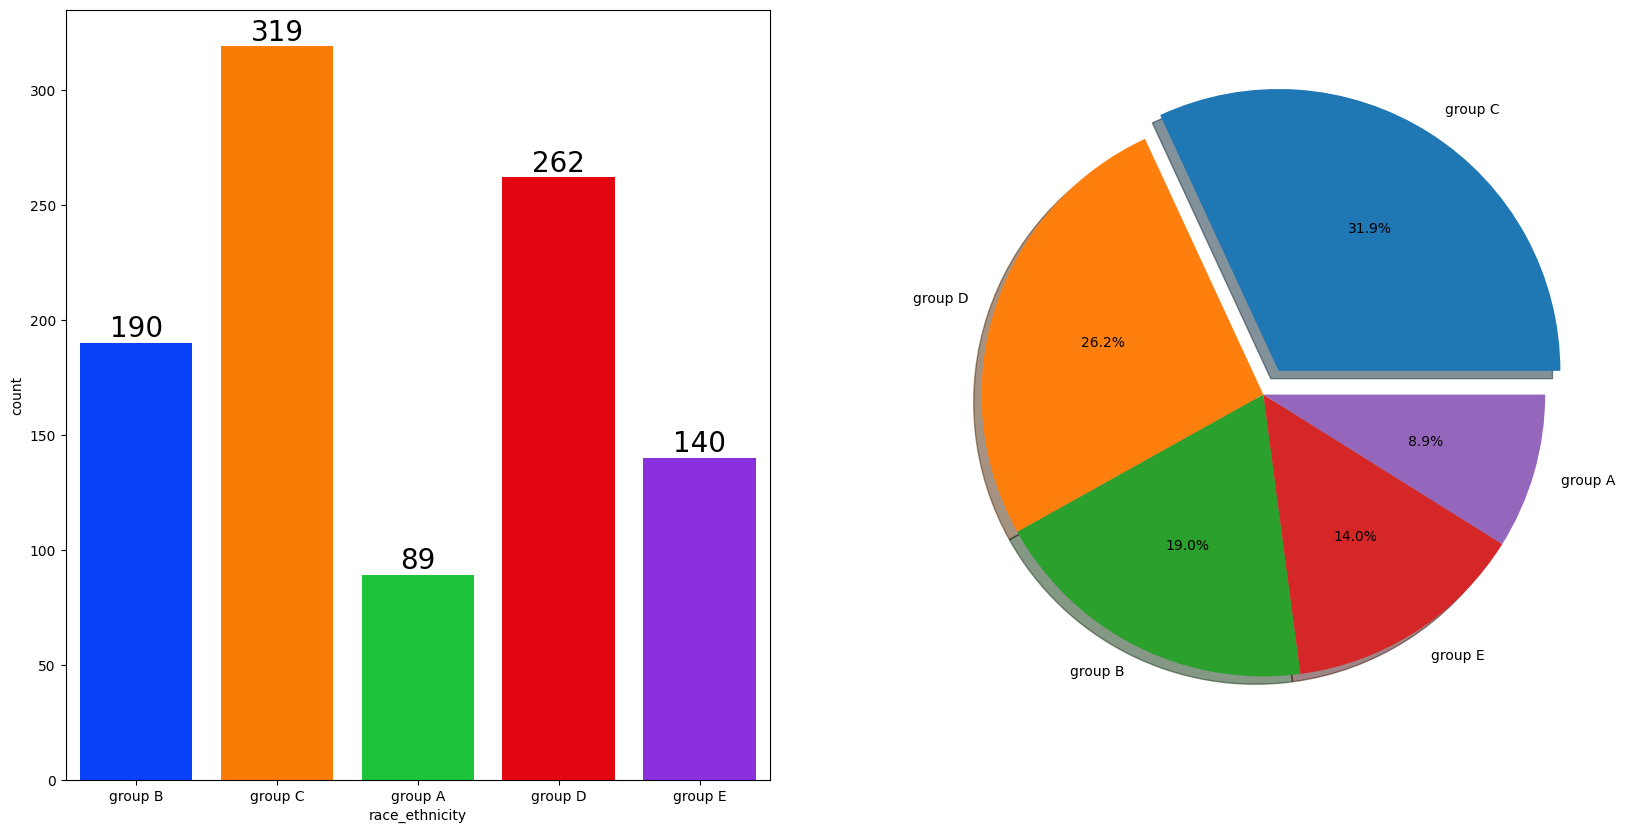

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### BIVARIATE ANALYSIS (Is race_ethnicity any impact on student's performance)

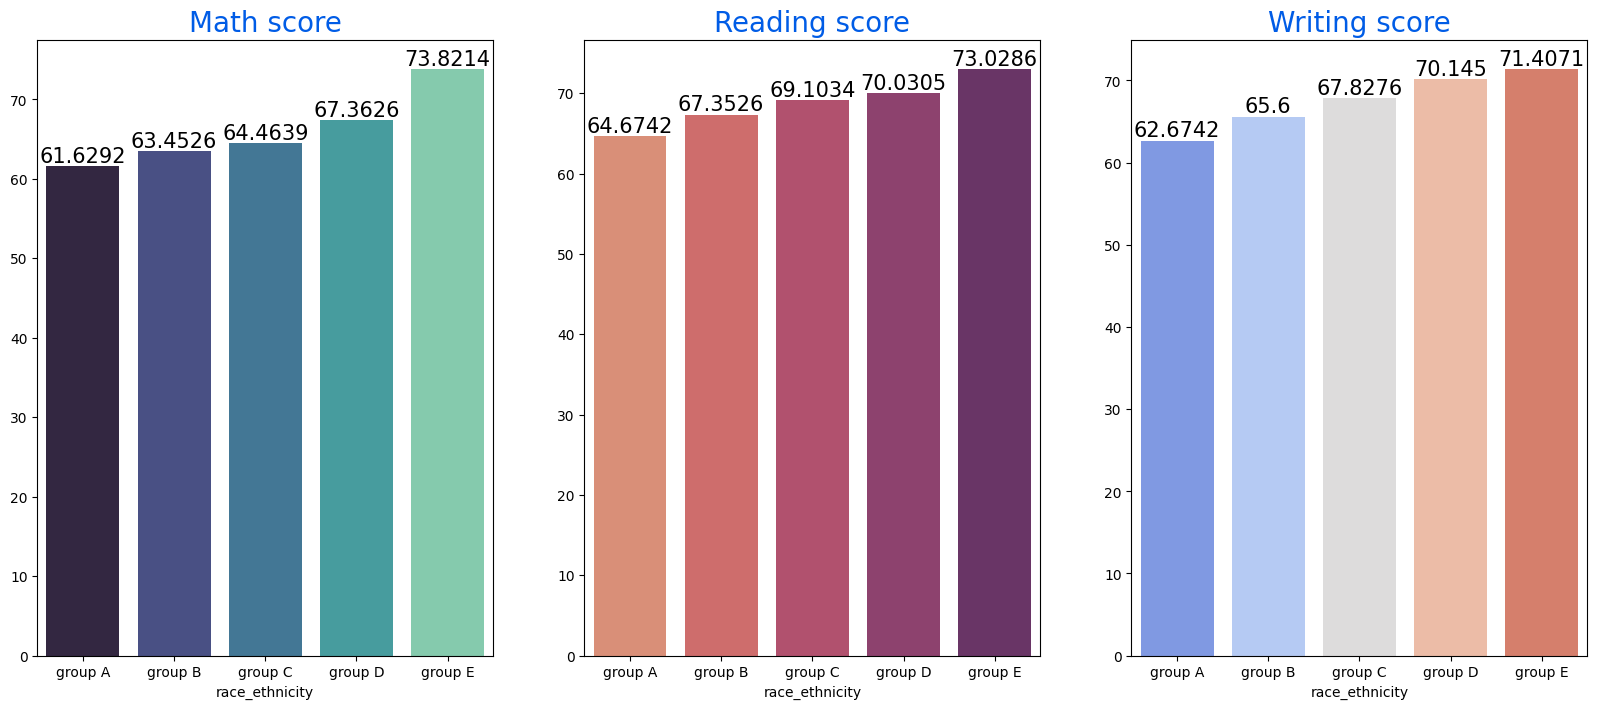

In [29]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### 4.4.3 PARENT LEVEL OF EDUCATION COLUMN
 - What is educational background of students parents?
 - Is parental education any impact on student's performance?

#### UNIVARIATE ANALYSIS (What is educational background of students parents?)

In [ ]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of parental education',fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

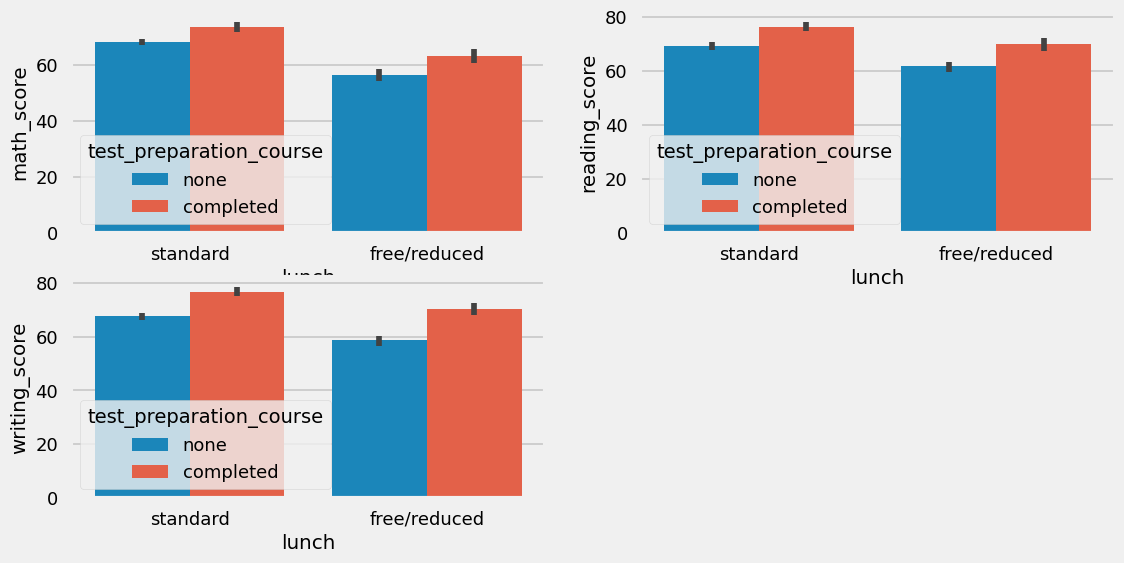

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### 4.4.6 CHECKING OUTLIERS

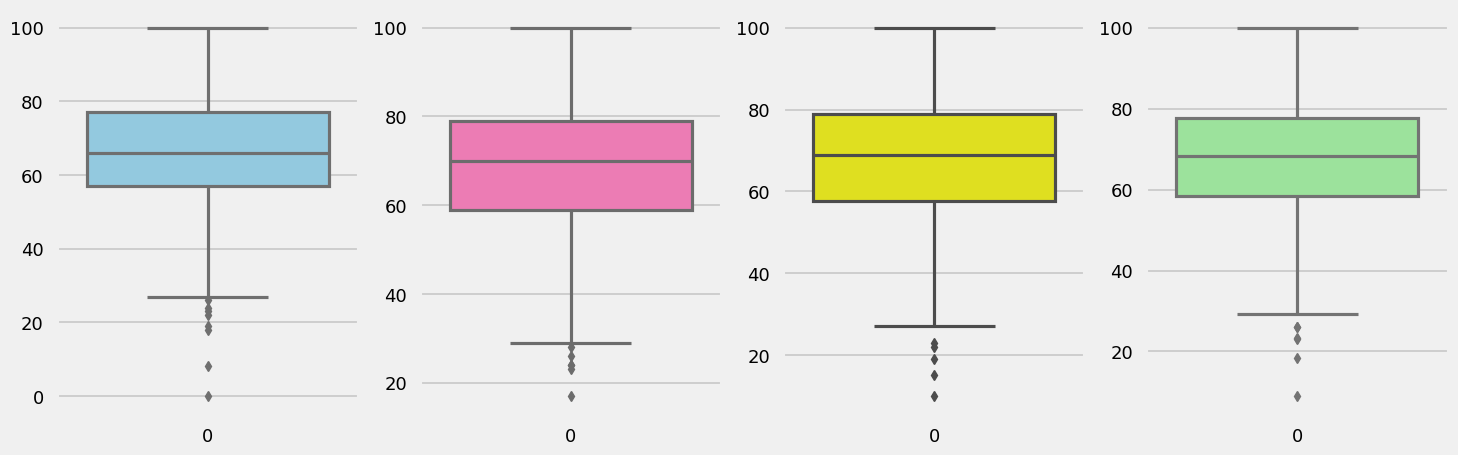

In [41]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

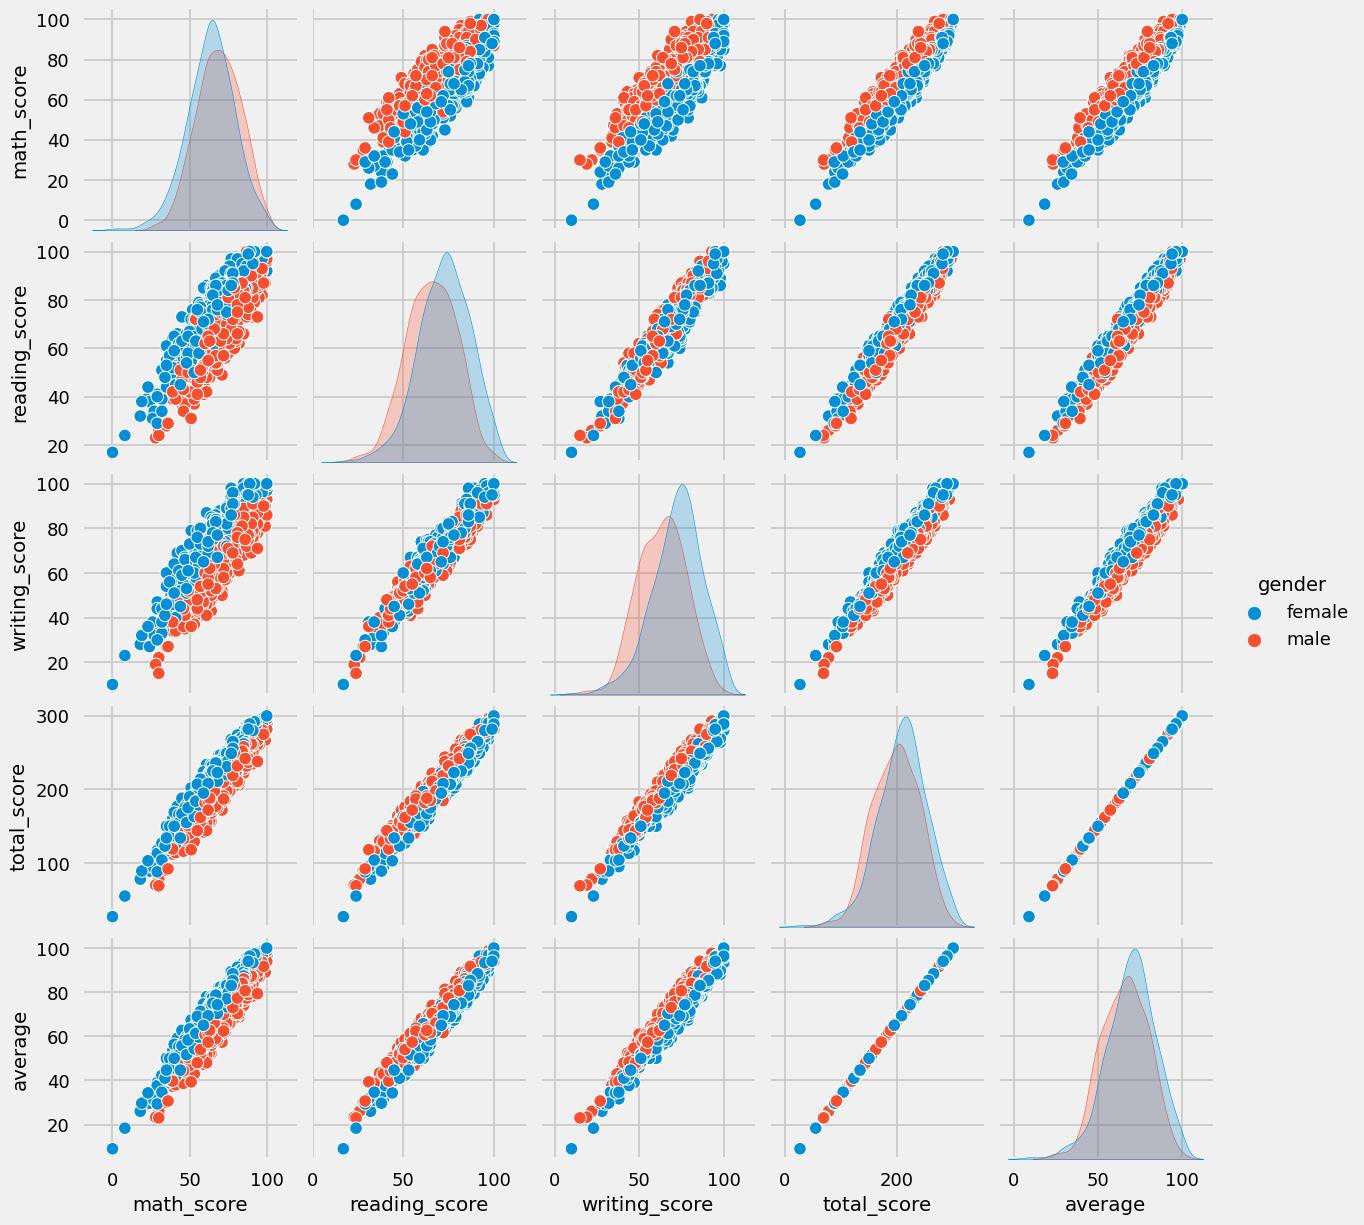

In [42]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.